In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import re
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer 
from pathlib import Path
from nltk.tokenize import word_tokenize
import glob
from zipfile import ZipFile
import pickle
from collections import Counter
import matplotlib.pyplot as plt


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
path = '/content/drive/MyDrive/'

In [ ]:
path

'/content/drive/MyDrive/'

In [ ]:
df=pd.read_csv(path+'IR-assignment-2-data.txt', sep=' ', header=None,names=["Relevance","Query","Col1","Col2","Col3","Col4","Col5","Col6","Col7","Col8","Col9","Col10","Col11","Col12","Col13","Col14","Col15","Col16","Col17","Col18","Col19","Col20","Col21","Col22","Col23","Col24","Col25","Col26","Col27","Col28","Col29","Col30","Col31","Col32","Col33","Col34","Col35","Col36","Col37","Col38","Col39","Col40","Col41","Col42","Col43","Col44","Col45","Col46","Col47","Col48","Col49","Col50","Col51","Col52","Col53","Col54","Col55","Col56","Col57","Col58","Col59","Col60","Col61","Col62","Col63","Col64","Col65","Col66","Col67","Col68","Col69","Col70","Col71","Col72","Col73","Col74","Col75","Col76","Col77","Col78","Col79","Col80","Col81","Col82","Col83","Col84","Col85","Col86","Col87","Col88","Col89","Col90","Col91","Col92","Col93","Col94","Col95","Col96","Col97","Col98","Col99","Col100","Col101","Col102","Col103","Col104","Col105","Col106","Col107","Col108","Col109","Col110","Col111","Col112","Col113","Col114","Col115","Col116","Col117","Col118","Col119","Col120","Col121","Col122","Col123","Col124","Col125","Col126","Col127","Col128","Col129","Col130","Col131","Col132","Col133","Col134","Col135","Col136","Col137"])

In [ ]:
df

,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,...,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136,Col137
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239088,0,qid:29989,1:2,2:0,3:1,4:1,5:2,6:1,7:0,8:0.50000,...,128:9754,129:29,130:2889,131:63571,132:1,133:1,134:0,135:0,136:0,NaN
239089,0,qid:29989,1:2,2:0,3:1,4:0,5:2,6:1,7:0,8:0.50000,...,128:84,129:1,130:9450,131:19599,132:4,133:4,134:0,135:0,136:0,NaN
239090,1,qid:29989,1:2,2:0,3:2,4:2,5:2,6:1,7:0,8:1,...,128:1,129:0,130:144,131:6701,132:5,133:2,134:0,135:0,136:0,NaN
239091,1,qid:29989,1:2,2:0,3:2,4:0,5:2,6:1,7:0,8:1,...,128:0,129:11,130:2152,131:65535,132:37,133:16,134:0,135:0,136:0,NaN


**PART**-**1**

In [ ]:
df_qid4 = df[df['Query'] == 'qid:4']

In [ ]:
df_qid4

,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,...,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136,Col137
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,NaN
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,NaN
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,NaN
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,NaN


In [ ]:
df_sorted = df_qid4.sort_values(by='Relevance',ascending=False)

In [ ]:
df_sorted

,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,...,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136,Col137
7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,NaN
76,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9,NaN
40,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0,NaN
36,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047,NaN
90,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:8,129:0,130:868,131:9260,132:246,133:88,134:0,135:0,136:0,NaN
43,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:4,129:0,130:797,131:9260,132:237,133:80,134:0,135:0,136:0,NaN
42,0,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,128:83,129:5,130:144,131:262,132:157,133:179,134:0,135:0,136:0,NaN
41,0,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,8:1,...,128:195,129:8,130:124,131:206,132:103,133:121,134:0,135:0,136:0,NaN


In [ ]:
len(df_sorted[df_sorted['Relevance'] == 4])

0

In [ ]:
len(df_sorted[df_sorted['Relevance'] == 3])

1

In [ ]:
len(df_sorted[df_sorted['Relevance'] == 2])

17

In [ ]:
len(df_sorted[df_sorted['Relevance'] == 1])

26

In [ ]:
len(df_sorted[df_sorted['Relevance'] == 0])

59

In [ ]:
import math
math.factorial(1)

1

In [ ]:
math.factorial(17)

355687428096000

In [ ]:
math.factorial(26)

403291461126605635584000000

In [ ]:
math.factorial(59)

138683118545689835737939019720389406345902876772687432540821294940160000000000000

**PART-2**

In [ ]:
math.factorial(1)*math.factorial(17)*math.factorial(26)*math.factorial(59)

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000

**PART-3**

In [ ]:
df_top50 = df_qid4.head(50)
df_top50

,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,...,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136,Col137
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
5,0,qid:4,1:3,2:1,3:2,4:1,5:3,6:1,7:0.333333,8:0.666667,...,128:82,129:7,130:123,131:4262,132:47,133:79,134:0,135:4,136:6.68,NaN
6,1,qid:4,1:3,2:0,3:1,4:1,5:3,6:1,7:0,8:0.333333,...,128:22,129:2,130:256,131:9102,132:28,133:23,134:0,135:0,136:0,NaN
7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,NaN
8,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:766,129:0,130:119,131:32560,132:45,133:24,134:0,135:0,136:0,NaN
9,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:367,129:8,130:266,131:398,132:89,133:114,134:0,135:0,136:0,NaN


In [ ]:
df_qid4_sorted = df_qid4.sort_values(['Relevance'],ascending=False).reset_index(drop=True)

In [ ]:
df_qid4_sorted

,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,...,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136,Col137
0,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,NaN
1,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9,NaN
2,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0,NaN
3,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047,NaN
4,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:8,129:0,130:868,131:9260,132:246,133:88,134:0,135:0,136:0,NaN
99,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:4,129:0,130:797,131:9260,132:237,133:80,134:0,135:0,136:0,NaN
100,0,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,128:83,129:5,130:144,131:262,132:157,133:179,134:0,135:0,136:0,NaN
101,0,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,8:1,...,128:195,129:8,130:124,131:206,132:103,133:121,134:0,135:0,136:0,NaN


In [ ]:
df_top50_sorted = df_qid4.sort_values(['Relevance'],ascending=False).head(50)

In [ ]:
df_top50_sorted

,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,...,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136,Col137
7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,NaN
76,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9,NaN
40,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0,NaN
36,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047,NaN
90,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0,NaN
25,2,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,128:2664,129:0,130:5753,131:11746,132:8,133:68,134:0,135:0,136:0,NaN
37,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:16417,131:9338,132:29,133:29,134:6,135:68,136:28.1902038750723,NaN
22,2,qid:4,1:3,2:1,3:3,4:0,5:3,6:1,7:0.333333,8:1,...,128:189,129:8,130:144,131:4307,132:82,133:108,134:0,135:0,136:0,NaN
21,2,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,8:1,...,128:8,129:5,130:144,131:395,132:13,133:56,134:0,135:0,136:0,NaN
19,2,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:553,129:2,130:876,131:10008,132:42,133:45,134:0,135:0,136:0,NaN


In [ ]:
df_top50_sorted = df_top50_sorted.reset_index(drop=True)
df_top50_sorted

,Relevance,Query,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,...,Col128,Col129,Col130,Col131,Col132,Col133,Col134,Col135,Col136,Col137
0,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,NaN
1,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9,NaN
2,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0,NaN
3,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047,NaN
4,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0,NaN
5,2,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,128:2664,129:0,130:5753,131:11746,132:8,133:68,134:0,135:0,136:0,NaN
6,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:16417,131:9338,132:29,133:29,134:6,135:68,136:28.1902038750723,NaN
7,2,qid:4,1:3,2:1,3:3,4:0,5:3,6:1,7:0.333333,8:1,...,128:189,129:8,130:144,131:4307,132:82,133:108,134:0,135:0,136:0,NaN
8,2,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,8:1,...,128:8,129:5,130:144,131:395,132:13,133:56,134:0,135:0,136:0,NaN
9,2,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:553,129:2,130:876,131:10008,132:42,133:45,134:0,135:0,136:0,NaN


In [ ]:
def DCG(relevances):
  res=0
  i=2
  res = relevances[0]
  for relevance in relevances[1:]:
    num=relevance
    den=math.log((i),2)
    res += num/den
    i+=1
    # print(relevance)
  return res


DCG at 50

In [ ]:
ideal_dcg50=DCG(df_top50_sorted['Relevance'])
print("Ideal DCG at 50:\t",ideal_dcg50)


Ideal DCG at 50:	 20.989750804831445


In [ ]:
dcg50=DCG(df_top50['Relevance'])
print("DCG at 50:\t",dcg50)

DCG at 50:	 7.39058096925802


DCG for Entire Dataset

In [ ]:
ideal_dcg=DCG(df_qid4_sorted['Relevance'])
print("Ideal DCG:\t",ideal_dcg)

Ideal DCG:	 20.989750804831445


In [ ]:
dcg=DCG(df_qid4['Relevance'])
print("DCG:\t",dcg)

DCG:	 12.550247459532576


**Part-4** **Precision-recall **

In [ ]:
a=df_qid4['Col75'].str.replace('75:', " ")
#df_colm75  = df_qid4.sort_values(by='col75',ascending=False)

In [ ]:
a

0         90.53171
1       538.388954
2        88.171761
3       144.564444
4       142.589323
          ...     
98       70.460443
99       270.13233
100     296.023694
101     528.520116
102      84.625987
Name: Col75, Length: 103, dtype: object

In [ ]:
b=pd.DataFrame(a)

In [ ]:
b

,Col75
0,90.53171
1,538.388954
2,88.171761
3,144.564444
4,142.589323
...,...
98,70.460443
99,270.13233
100,296.023694
101,528.520116


In [ ]:
c=pd.to_numeric(b['Col75'])

In [ ]:
c

0       90.531710
1      538.388954
2       88.171761
3      144.564444
4      142.589323
          ...    
98      70.460443
99     270.132330
100    296.023694
101    528.520116
102     84.625987
Name: Col75, Length: 103, dtype: float64

In [ ]:
d= pd.DataFrame(c)

In [ ]:
d

,Col75
0,90.531710
1,538.388954
2,88.171761
3,144.564444
4,142.589323
...,...
98,70.460443
99,270.132330
100,296.023694
101,528.520116


In [ ]:
df_colm75  = d.sort_values(['Col75'],ascending=False)

In [ ]:
df_colm75

,Col75
8,972.826451
67,612.893205
56,571.500533
1,538.388954
101,528.520116
...,...
94,15.773388
16,14.972391
86,14.972391
49,3.539923


In [ ]:
aa=pd.DataFrame(df_qid4['Relevance'])

In [ ]:
aa

,Relevance
0,0
1,0
2,0
3,0
4,1
...,...
98,0
99,1
100,2
101,1


In [ ]:
replaced_2= aa['Relevance'].replace(2,1)

In [ ]:
replaced_2

0      0
1      0
2      0
3      0
4      1
      ..
98     0
99     1
100    1
101    1
102    0
Name: Relevance, Length: 103, dtype: int64

In [ ]:
replace_df= pd.DataFrame(replaced_2) #converting replaced_lst into dataframe

In [ ]:
replace_df #this is the df without 2 in relevance column

,Relevance
0,0
1,0
2,0
3,0
4,1
...,...
98,0
99,1
100,1
101,1


In [ ]:
replaced_3= replace_df['Relevance'].replace(3,1)

In [ ]:
replaced_3

0      0
1      0
2      0
3      0
4      1
      ..
98     0
99     1
100    1
101    1
102    0
Name: Relevance, Length: 103, dtype: int64

In [ ]:
replace_df1= pd.DataFrame(replaced_3)

In [ ]:
replace_df1

,Relevance
0,0
1,0
2,0
3,0
4,1
...,...
98,0
99,1
100,1
101,1


In [ ]:
hh = replace_df1.join(df_colm75['Col75'])

In [ ]:
hh

,Relevance,Col75
0,0,90.531710
1,0,538.388954
2,0,88.171761
3,0,144.564444
4,1,142.589323
...,...,...
98,0,70.460443
99,1,270.132330
100,1,296.023694
101,1,528.520116


In [ ]:
joined_col75 = hh.sort_values(['Col75'],ascending=False)

In [ ]:
joined_col75 #Relevance-Col75 dataframe

,Relevance,Col75
8,0,972.826451
67,0,612.893205
56,0,571.500533
1,0,538.388954
101,1,528.520116
...,...,...
94,0,15.773388
16,0,14.972391
86,0,14.972391
49,0,3.539923


In [ ]:
joined_col75['Relevance']

8      0
67     0
56     0
1      0
101    1
      ..
94     0
16     0
86     0
49     0
81     0
Name: Relevance, Length: 103, dtype: int64

In [ ]:
def fun_precision():
    list_precision = []
    total=0
    relevants=0
    for i in (joined_col75['Relevance']):
      if(i==1):
        relevants = relevants+1
        print(i)
      total+=1
      precision = relevants/total
      print(precision)
      list_precision.append(precision)
    return list_precision          

In [ ]:

count =0
list_precision= fun_precision()
list_precision

0.0
0.0
0.0
0.0
1
0.2
0.16666666666666666
1
0.2857142857142857
1
0.375
0.3333333333333333
1
0.4
0.36363636363636365
1
0.4166666666666667
1
0.46153846153846156
1
0.5
1
0.5333333333333333
1
0.5625
0.5294117647058824
1
0.5555555555555556
0.5263157894736842
1
0.55
0.5238095238095238
0.5
1
0.5217391304347826
1
0.5416666666666666
1
0.56
1
0.5769230769230769
0.5555555555555556
0.5357142857142857
0.5172413793103449
0.5
0.4838709677419355
1
0.5
0.48484848484848486
1
0.5
0.4857142857142857
0.4722222222222222
1
0.4864864864864865
1
0.5
0.48717948717948717
1
0.5
1
0.5121951219512195
1
0.5238095238095238
0.5116279069767442
0.5
0.4888888888888889
0.4782608695652174
1
0.48936170212765956
0.4791666666666667
0.46938775510204084
1
0.48
1
0.49019607843137253
1
0.5
0.49056603773584906
1
0.5
1
0.509090909090909
0.5
1
0.5087719298245614
1
0.5172413793103449
0.5084745762711864
1
0.5166666666666667
0.5081967213114754
0.5
1
0.5079365079365079
0.5
0.49230769230769234
0.48484848484848486
1
0.4925373134328358
0.4

[0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.16666666666666666,
 0.2857142857142857,
 0.375,
 0.3333333333333333,
 0.4,
 0.36363636363636365,
 0.4166666666666667,
 0.46153846153846156,
 0.5,
 0.5333333333333333,
 0.5625,
 0.5294117647058824,
 0.5555555555555556,
 0.5263157894736842,
 0.55,
 0.5238095238095238,
 0.5,
 0.5217391304347826,
 0.5416666666666666,
 0.56,
 0.5769230769230769,
 0.5555555555555556,
 0.5357142857142857,
 0.5172413793103449,
 0.5,
 0.4838709677419355,
 0.5,
 0.48484848484848486,
 0.5,
 0.4857142857142857,
 0.4722222222222222,
 0.4864864864864865,
 0.5,
 0.48717948717948717,
 0.5,
 0.5121951219512195,
 0.5238095238095238,
 0.5116279069767442,
 0.5,
 0.4888888888888889,
 0.4782608695652174,
 0.48936170212765956,
 0.4791666666666667,
 0.46938775510204084,
 0.48,
 0.49019607843137253,
 0.5,
 0.49056603773584906,
 0.5,
 0.509090909090909,
 0.5,
 0.5087719298245614,
 0.5172413793103449,
 0.5084745762711864,
 0.5166666666666667,
 0.5081967213114754,
 0.5,
 0.5079365079365079,
 0.5,


In [ ]:
list_precision

[0.0,
 0.0,
 0.0,
 0.0,
 0.2,
 0.16666666666666666,
 0.2857142857142857,
 0.375,
 0.3333333333333333,
 0.4,
 0.36363636363636365,
 0.4166666666666667,
 0.46153846153846156,
 0.5,
 0.5333333333333333,
 0.5625,
 0.5294117647058824,
 0.5555555555555556,
 0.5263157894736842,
 0.55,
 0.5238095238095238,
 0.5,
 0.5217391304347826,
 0.5416666666666666,
 0.56,
 0.5769230769230769,
 0.5555555555555556,
 0.5357142857142857,
 0.5172413793103449,
 0.5,
 0.4838709677419355,
 0.5,
 0.48484848484848486,
 0.5,
 0.4857142857142857,
 0.4722222222222222,
 0.4864864864864865,
 0.5,
 0.48717948717948717,
 0.5,
 0.5121951219512195,
 0.5238095238095238,
 0.5116279069767442,
 0.5,
 0.4888888888888889,
 0.4782608695652174,
 0.48936170212765956,
 0.4791666666666667,
 0.46938775510204084,
 0.48,
 0.49019607843137253,
 0.5,
 0.49056603773584906,
 0.5,
 0.509090909090909,
 0.5,
 0.5087719298245614,
 0.5172413793103449,
 0.5084745762711864,
 0.5166666666666667,
 0.5081967213114754,
 0.5,
 0.5079365079365079,
 0.5,


In [ ]:

def fun_recall():
    list_recall = []
    denom = dict(Counter(joined_col75['Relevance']))[1]
    relevants=0
    for i in (joined_col75['Relevance']):
      if(i==1):
        relevants = relevants+1
        print(i)
      recall = relevants/denom
      print(recall)
      list_recall.append(recall)
    return list_recall          

In [ ]:
list_recall= fun_recall()
list_recall

0.0
0.0
0.0
0.0
1
0.022727272727272728
0.022727272727272728
1
0.045454545454545456
1
0.06818181818181818
0.06818181818181818
1
0.09090909090909091
0.09090909090909091
1
0.11363636363636363
1
0.13636363636363635
1
0.1590909090909091
1
0.18181818181818182
1
0.20454545454545456
0.20454545454545456
1
0.22727272727272727
0.22727272727272727
1
0.25
0.25
0.25
1
0.2727272727272727
1
0.29545454545454547
1
0.3181818181818182
1
0.3409090909090909
0.3409090909090909
0.3409090909090909
0.3409090909090909
0.3409090909090909
0.3409090909090909
1
0.36363636363636365
0.36363636363636365
1
0.38636363636363635
0.38636363636363635
0.38636363636363635
1
0.4090909090909091
1
0.4318181818181818
0.4318181818181818
1
0.45454545454545453
1
0.4772727272727273
1
0.5
0.5
0.5
0.5
0.5
1
0.5227272727272727
0.5227272727272727
0.5227272727272727
1
0.5454545454545454
1
0.5681818181818182
1
0.5909090909090909
0.5909090909090909
1
0.6136363636363636
1
0.6363636363636364
0.6363636363636364
1
0.6590909090909091
1
0.68181818

[0.0,
 0.0,
 0.0,
 0.0,
 0.022727272727272728,
 0.022727272727272728,
 0.045454545454545456,
 0.06818181818181818,
 0.06818181818181818,
 0.09090909090909091,
 0.09090909090909091,
 0.11363636363636363,
 0.13636363636363635,
 0.1590909090909091,
 0.18181818181818182,
 0.20454545454545456,
 0.20454545454545456,
 0.22727272727272727,
 0.22727272727272727,
 0.25,
 0.25,
 0.25,
 0.2727272727272727,
 0.29545454545454547,
 0.3181818181818182,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.3409090909090909,
 0.36363636363636365,
 0.36363636363636365,
 0.38636363636363635,
 0.38636363636363635,
 0.38636363636363635,
 0.4090909090909091,
 0.4318181818181818,
 0.4318181818181818,
 0.45454545454545453,
 0.4772727272727273,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5227272727272727,
 0.5227272727272727,
 0.5227272727272727,
 0.5454545454545454,
 0.5681818181818182,
 0.5909090909090909,
 0.5909090909090909,
 0.6136363636363636,
 0.6363636363636364

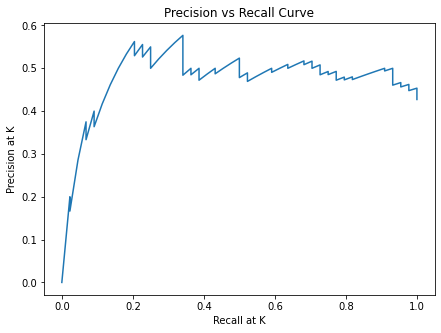

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Precision vs Recall Curve")
plt.xlabel('Recall at K')
plt.ylabel('Precision at K')
plt.plot(list_recall,list_precision)
plt.show()